In [120]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [121]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family" : "Computer Modern Serif", 
})

____
# EXAMPLE 1

The target starts level with the seeker and moves on a circular ark until interception.

In [122]:
def ex1ODE(y, t, K, ome, theta0):
    theta = theta0 + ome*t
    delta = np.arcsin(np.sin(theta)/K)
    dydt = [np.cos(theta) - K*np.cos(delta)]
    return dydt

In [123]:
r0 = [1.5]

In [124]:
dt = 0.001
T = np.arange(0,1.,dt)

In [125]:
def plot_trajectories(K, ome, r0, theta0, t=T):
    r0 = [r0]
    sol = odeint(ex1ODE, r0, t, args=(K, ome, theta0))
    r = sol[:,0]
    
    if theta0 != np.pi/2:
        lam = np.arctan((np.sin(theta0))/(np.cos(theta0)-r0[0]))
    else:
        lam = np.pi
    
    plt.plot(np.cos(ome*T) - np.cos(lam)*r, np.sin(ome*T) - np.sin(lam)*r)
    plt.plot(np.cos(ome*T + theta0 - np.pi/2), np.sin(ome*T + theta0 - np.pi/2))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

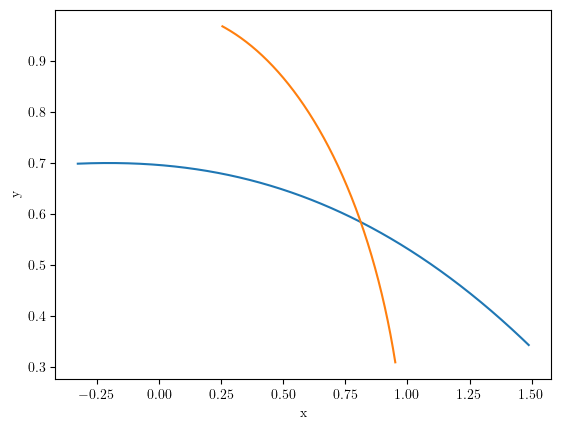

In [126]:
plot_trajectories(2., 1., 1.5, np.pi/2 + np.pi/10)

____
# EXAMPLE 2

The target is stationary and the seeker is launched with arbitrary velocity and must find the target using proportional navigation and keeping the speed constant.

In [127]:
def ex3ODE(y, t, delta0, vm0, N):
    r, lam = y
    
    dydt = [-vm0 * np.cos((N-1)*lam + delta0), -vm0 * np.sin((N-1)*lam + delta0)/r]
    
    return dydt

In [128]:
dt = 0.001
T = np.arange(0,5.,dt)

In [129]:
x0, y0 = (10., 10.)
lambda0 = np.arctan(y0/x0)
r0 = np.sqrt(x0**2 + y0**2)

delta0 = 0.1
vM0 = 10.
N = 4.

sol = odeint(ex3ODE, [r0, lambda0], T, args=(delta0, vM0, N))

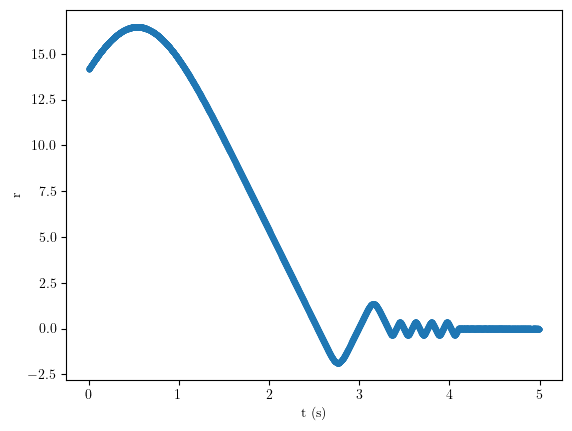

In [130]:
plt.plot(T, sol[:,0], '.')
plt.xlabel('t (s)')
plt.ylabel('r')
plt.show()

In [131]:
aM = (N*vM0**2*np.sin(delta0)/(r0**2))*sol[:,0]

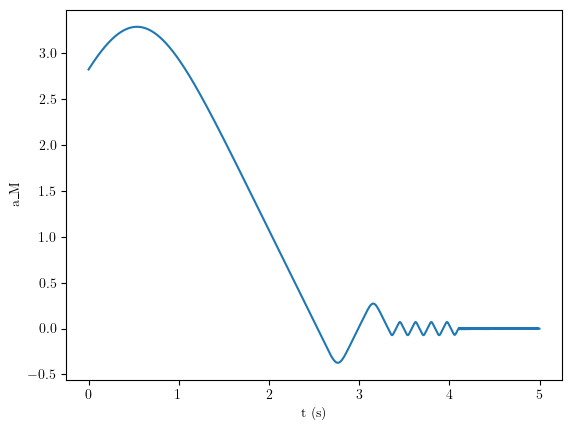

In [132]:
plt.plot(T, aM)
plt.xlabel('t (s)')
plt.ylabel('a_M')
plt.show()

In [133]:
X = x0*np.ones_like(T) - sol[:,0]*np.cos(sol[:,1])
Y = y0*np.ones_like(T) - sol[:,0]*np.sin(sol[:,1])

In [134]:
def plot_trajectoriesEX3(args):
    '''
    args:
     - dt (float)
     -  target_pos (tuple)
     -  delta0 (float)
     -  vm0 (float)
     -  N (list)
    '''
    
    x0, y0 = args['target_pos']
    lambda0 = np.arctan(y0/x0)
    r0 = np.sqrt(x0**2 + y0**2)
    
    delta0 = args['delta0']
    vM0 = args['vm0']
    N = args['N']
    
    T = np.arange(0., 5., args['dt'])
    
    X = []
    Y = []
    
    for number in N:
        sol = odeint(ex3ODE, [r0, lambda0], T, args=(delta0, vM0, number))
        near_intersection = np.intersect1d(np.nonzero(np.abs(sol[:,0])< 0.01), np.nonzero(sol[:,0]>0))
        ind = np.min(near_intersection) + 1
        
        X.append(x0*np.ones_like(T[0:ind]) - sol[:ind,0]*np.cos(sol[:ind,1]))
        Y.append(y0*np.ones_like(T[0:ind]) - sol[:ind,0]*np.sin(sol[:ind,1]))
        
    
    for i in range(len(N)):
        plt.plot(X[i], Y[i], label='N = ' + f'{N[i]}')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

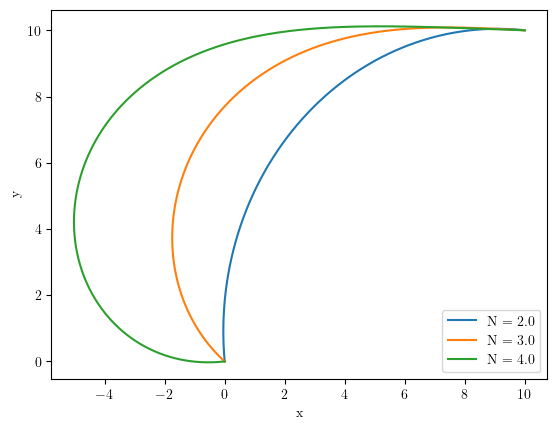

In [135]:
args = {'dt':0.001, 'target_pos':(10.,10.), 'delta0': 0.1, 'vm0':10., 'N':[2.,3.,4.]}
plot_trajectoriesEX3(args)

____
# EXAMPLE 3

The target moves with a constant velocity. The seeker is launched with arbitrary velocity and must find the target using proportional navigation and maintaining constant speed.

In [136]:
def ex4ODE(y, t, delta0, gammaT, vM, vT, N):
    r, lam = y
    
    dydt = [
        vT*np.cos(gammaT - lam) - vM*np.cos((N-1)*lam + delta0),
        (vT*np.sin(gammaT - lam) - vM*np.sin((N-1)*lam + delta0))/r
    ]
    
    return dydt

In [137]:
dt = 0.001
T = np.arange(0,10.,dt)

In [138]:
x0, y0 = (10., 10.)
lambda0 = np.arctan(y0/x0)
r0 = np.sqrt(x0**2 + y0**2)

delta0 = 0.1
gammaT = np.pi/4
vT0 = 2.
vM0 = 10.
N = 2.

sol = odeint(ex4ODE, [r0, lambda0], T, args=(delta0, gammaT, vM0, vT0, N))

Text(0, 0.5, 'r')

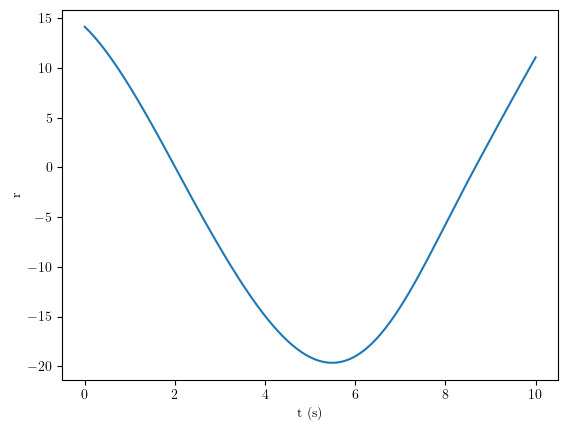

In [139]:
plt.plot(T, sol[:,0])
plt.xlabel('t (s)')
plt.ylabel('r')


In [140]:
XT = x0 + vT0*np.cos(gammaT)*T
YT = y0 + vT0*np.sin(gammaT)*T

In [141]:
XM = XT - sol[:,0]*np.cos(sol[:,1])
YM = YT - sol[:,0]*np.sin(sol[:,1])

In [142]:
def plot_trajectoriesEX4(args):
    '''
    args:
     - dt (float)
     - target_pos (tuple)
     - delta0 (float)
     - gammaT (float)
     - vm0 (float)
     - vt0 (float)
     - N (list)
    '''
    
    x0, y0 = args['target_pos']
    lambda0 = np.arctan(y0/x0)
    r0 = np.sqrt(x0**2 + y0**2)
    
    delta0 = args['delta0']
    gammaT = args['gammaT']
    vM0 = args['vm0']
    vT0 = args['vt0']
    N = args['N']
    
    T = np.arange(0., 5., args['dt'])
    
    XT = x0 + vT0*np.cos(gammaT)*T
    YT = y0 + vT0*np.sin(gammaT)*T
    
    X = []
    Y = []
    
    for number in N:
        sol = odeint(ex4ODE, [r0, lambda0], T, args=(delta0, gammaT, vM0, vT0, number))
        near_intersection = np.intersect1d(np.nonzero(np.abs(sol[:,0])< 0.01), np.nonzero(sol[:,0]>0))
        ind = np.min(near_intersection) + 1
        
        X.append(XT[0:ind] - sol[:ind,0]*np.cos(sol[:ind,1]))
        Y.append(YT[0:ind] - sol[:ind,0]*np.sin(sol[:ind,1]))
        
    
    for i in range(len(N)):
        plt.plot(X[i], Y[i], label='N = ' + f'{N[i]}')
        
    plt.plot(XT, YT)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

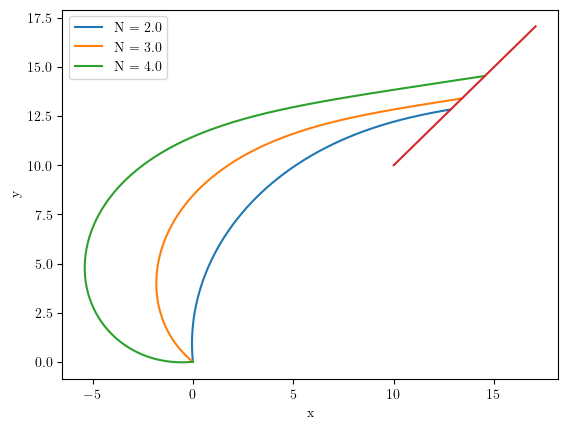

In [143]:
args = {'dt':0.001, 'target_pos':(10.,10.), 'delta0': 0.1, 'gammaT':np.pi/4, 'vm0':10., 'vt0':2., 'N':[2.,3.,4.]}
plot_trajectoriesEX4(args)

____
# EXAMPLE 4

The target moves on a plane wave with fixed propagation direction, speed, and frequency. The seeker is launched with arbitrary velocity and must find the target using proportional navigation while keeping the speen constant.

In [144]:
nu = 1.
A = 0.5
ome = np.pi/1.5
alpha = np.pi/4
phi = 0.

dt = 0.001
T = np.arange(0,10.,dt)

XT = nu*np.cos(alpha)*T - A*np.sin(alpha)*np.cos(ome*T + phi)
YT = nu*np.sin(alpha)*T + A*np.cos(alpha)*np.cos(ome*T + phi)

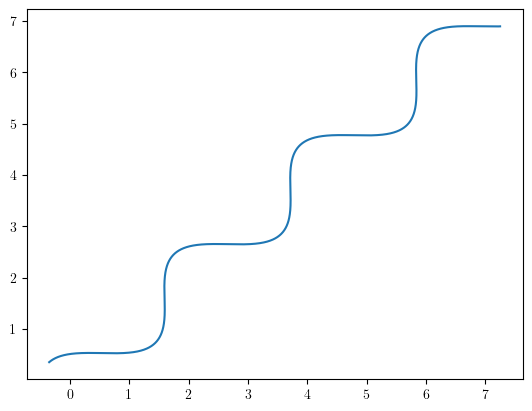

In [145]:
plt.plot(XT, YT)

In [146]:
def ex5ODE(y, t, delta0, vM, N, osc_args):
    r, lam = y
    
    nu = osc_args['nu']
    A = osc_args['A']
    ome = osc_args['ome']
    phi = osc_args['phi']
    alpha = osc_args['alpha']
    
    vTx = nu*np.cos(alpha) + A*ome*np.sin(alpha)*np.sin(ome*t + phi)
    vTy = nu*np.sin(alpha) - A*ome*np.cos(alpha)*np.sin(ome*t + phi)
    
    vT = np.sqrt(vTx**2 + vTy**2)
    gammaT = np.arctan(vTy/vTx)
    
    dydt = [
        vT*np.cos(gammaT - lam) - vM*np.cos((N-1)*lam + delta0),
        (vT*np.sin(gammaT - lam) - vM*np.sin((N-1)*lam + delta0))/r
    ]
    
    return dydt

In [147]:
osc_args = {'nu' : 1.,
    'A' : 0.5,
    'ome' : np.pi/1.5,
    'alpha' : np.pi/4,
    'phi' : 0.}

x0, y0 = (10., 10.)
lambda0 = np.arctan(y0/x0)
r0 = np.sqrt(x0**2 + y0**2)

delta0 = 0.1
vM0 = 10.
N = 2.

sol = odeint(ex5ODE, [r0, lambda0], T, args=(delta0, vM0, N, osc_args))

In [148]:
def plot_trajectoriesEX5(args, osc_args):
    '''
    args:
     - dt (float)
     - target_pos (tuple)
     - delta0 (float)
     - vm0 (float)
     N
     
    osc_args:
     - nu (float)
     - A (float)
     - ome (float)
     - alpha (float)
     - phi (float)
    '''
    
    x0, y0 = args['target_pos']
    
    delta0 = args['delta0']
    vM0 = args['vm0']
    N = args['N']
    
    A = osc_args['A']
    alpha = osc_args['alpha']
    ome = osc_args['ome']
    phi = osc_args['phi']
    nu = osc_args['nu']
    
    T = np.arange(0., 5., args['dt'])
    
    #This definition of (XT, YT) uses the initial point (x0, y0) provided by the user
    XT = nu*np.cos(alpha)*T - A*np.sin(alpha)*np.cos(ome*T + phi) + x0
    YT = nu*np.sin(alpha)*T + A*np.cos(alpha)*np.cos(ome*T + phi) + y0
    
    #The initial conditions of the kinematics require using the true initial point of the target, which would be obtained by evalutaing
    #(XT, YT) at t=0, hence we must shift the user-provided (x0, y0) to take into account the phase of the target
    x0 = x0 - A*np.sin(alpha)*np.cos(phi)
    y0 = y0 + A*np.cos(alpha)*np.sin(phi)
    lambda0 = np.arctan(y0/x0)
    r0 = np.sqrt(x0**2 + y0**2)
    
    X = []
    Y = []
    
    for number in N:
        sol = odeint(ex5ODE, [r0, lambda0], T, args=(delta0, vM0, number, osc_args))
        near_intersection = np.intersect1d(np.nonzero(np.abs(sol[:,0])< 0.01), np.nonzero(sol[:,0]>0))
        ind = np.min(near_intersection) + 1
        
        X.append(XT[0:ind] - sol[:ind,0]*np.cos(sol[:ind,1]))
        Y.append(YT[0:ind] - sol[:ind,0]*np.sin(sol[:ind,1]))
        
    
    for i in range(len(N)):
        plt.plot(X[i], Y[i], label='N = ' + f'{N[i]}')
        
    plt.plot(XT, YT)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

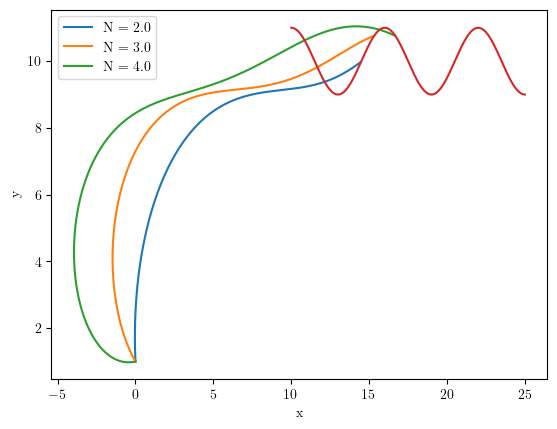

In [149]:
args = {'dt':0.001, 'target_pos':(10.,10.), 'delta0': 0.1, 'vm0':13., 'N':[2.,3.,4.]}
osc_args = {'nu' : 3., 'A' :1., 'ome' : np.pi, 'alpha' : 0, 'phi' : 0.}
plot_trajectoriesEX5(args, osc_args)

____
# EXAMPLE 5

The target is stationary in 2D space. The seeker is launched with arbitrary velocity and finds the target using proportional navigation while keeping its speed constant. The set up is meant to look like the 3D method used in the subsequent problem.

In [150]:
def exPre6ODE(y, t, vM, N):
    r, alpha, gamma = y
    
    dydt = [
        -vM*np.cos(alpha - gamma),
        vM*np.sin(alpha-gamma)/r,
        N*vM*np.sin(alpha-gamma)/r
    ]
    
    return dydt

In [151]:
x0, y0 = (10., 10.)
r0 = np.sqrt(x0**2 + y0**2)
alpha0 = np.arccos(x0/r0)

gamma0 = alpha0

vM0 = 5.
N = 2.

dt = 0.001
T = np.arange(0., 10., dt)

sol = odeint(exPre6ODE, [r0, alpha0, gamma0], T, args=(vM0, N))

Text(0, 0.5, 'r')

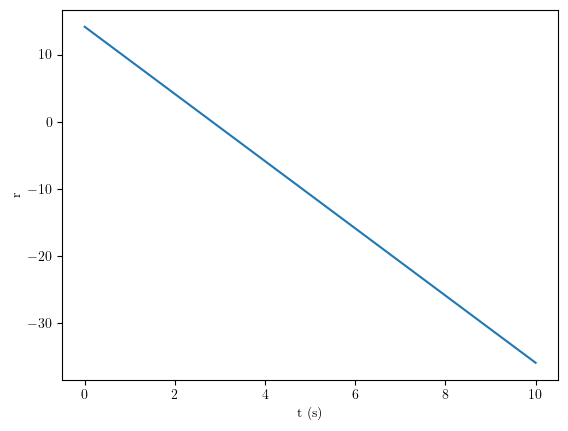

In [152]:
plt.plot(T, sol[:,0])
plt.xlabel('t (s)')
plt.ylabel('r')

____
# EXAMPLE 6

The target is stationary in 3D. The seeker is launched with arbitrary velocity and must find the target using proportional navigation and while keep its speed constant.

In [153]:
def ex6ODE(y, t, vM, N):
    r, beta, alpha, theta, gamma, = y
    
    dydt = [
        -vM*(np.cos(beta)*np.cos(theta) + np.sin(beta)*np.sin(theta)*np.cos(alpha-gamma)),
        vM*(np.cos(theta)*np.sin(beta) - np.cos(beta)*np.sin(theta)*np.cos(alpha-gamma))/r,
        vM*np.sin(theta)*np.sin(alpha-gamma)/(r*np.sin(beta)),
        N*vM*(np.cos(alpha-gamma)*np.cos(theta)*np.sin(beta) - np.cos(beta)*np.sin(theta))/r,
        N*vM*np.sin(beta)*np.sin(alpha-gamma)/(r*np.sin(theta))
    ]
    
    return dydt

In [154]:
x0, y0, z0 = (10., 10., 10.)
r0 = np.sqrt(x0**2 + y0**2 + z0**2)

beta0 = np.arccos(z0/r0)
alpha0 = np.arccos(x0/np.sqrt(x0**2 + y0**2))

theta0 = beta0 + 0.5
gamma0 = alpha0 + 0.5

dt = 0.001
T = np.arange(0., 1.9, dt)

vM0 = 10.0
N = 2.

sol = odeint(ex6ODE, [r0, beta0, alpha0, theta0, gamma0],T, args=(vM0, N))

Text(0, 0.5, 'r')

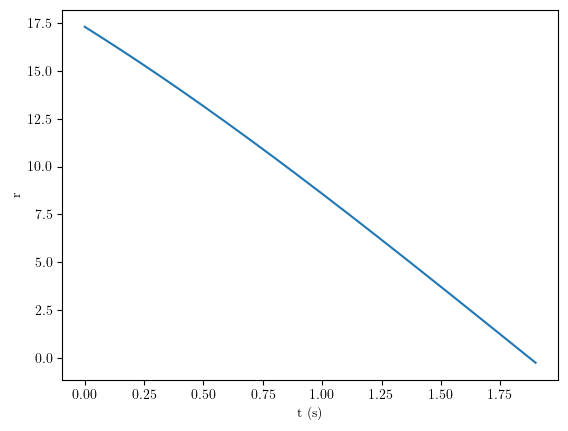

In [155]:
plt.plot(T, sol[:,0])
plt.xlabel('t (s)')
plt.ylabel('r')

In [156]:
XM = x0*np.ones_like(T) - sol[:,0]*np.sin(sol[:,1])*np.cos(sol[:,2])
YM = y0*np.ones_like(T) - sol[:,0]*np.sin(sol[:,1])*np.sin(sol[:,2])
ZM = z0*np.ones_like(T) - sol[:,0]*np.cos(sol[:,1])

In [157]:
fig = plt.figure()
ax = Axes3D(fig)
asd = ax.plot(XM, YM, ZM)
plt.show()

<Figure size 640x480 with 0 Axes>

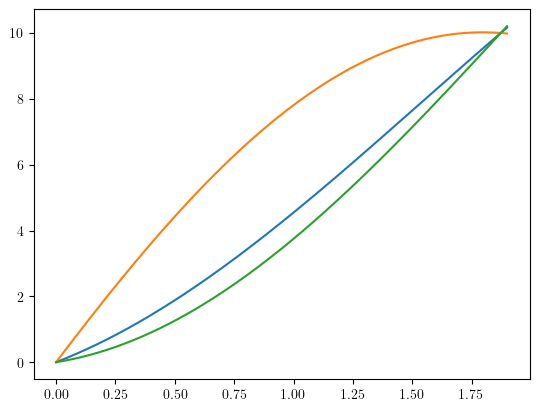

In [158]:
plt.plot(T, XM)
plt.plot(T, YM)
plt.plot(T, ZM)
plt.show()

In [159]:
def plot_trajectoriesEX6(args):
    '''
    args:
     - dt (float)
     - target_pos (tuple)
     - delta1 (float): theta0 = beta0 + delta1
     - delta2 (float): gamma0 = alpha0 + delta2
     - vm0 (float)
     - N (float)
    '''
    
    x0, y0, z0 = args['target_pos']
    r0 = np.sqrt(x0**2 + y0**2 + z0**2)

    beta0 = np.arccos(z0/r0)
    alpha0 = np.arccos(x0/np.sqrt(x0**2 + y0**2))
    
    theta0 = beta0 + args['delta1']
    gamma0 = alpha0 + args['delta2']
    
    T = np.arange(0., 5., args['dt'])
    
    N = args['N']
    
    sol = odeint(ex6ODE, [r0, beta0, alpha0, theta0, gamma0],T, args=(vM0, N))
    near_intersection = np.intersect1d(np.nonzero(np.abs(sol[:,0])< 0.01), np.nonzero(sol[:,0]>0))
    ind = np.min(near_intersection) + 1
    
    XM = x0*np.ones_like(T[:ind]) - sol[:ind,0]*np.sin(sol[:ind,1])*np.cos(sol[:ind,2])
    YM = y0*np.ones_like(T[:ind]) - sol[:ind,0]*np.sin(sol[:ind,1])*np.sin(sol[:ind,2])
    ZM = z0*np.ones_like(T[:ind]) - sol[:ind,0]*np.cos(sol[:ind,1])
    
    plt.plot(T[:ind], XM, label='xM')
    plt.plot(T[:ind], YM, label='yM')
    plt.plot(T[:ind], ZM, label='zM')
    plt.legend()
    plt.xlabel('t (s)')
    plt.show()
    
    ax = plt.figure().add_subplot(projection='3d')

    ax.plot(XM, YM, ZM)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    plt.show()

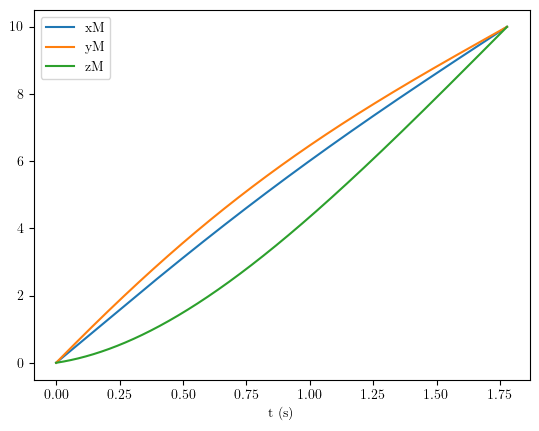

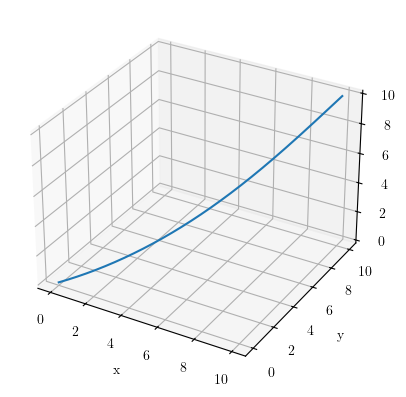

In [160]:
args = {'dt':0.001, 'target_pos':(10., 10., 10.), 'delta1':0.5, 'delta2':0.1, 'vm0':10., 'N':3.}
plot_trajectoriesEX6(args)

____
# EXAMPLE 7

The target moves with constant velocity in 3D. The seeker is launched with arbitrary velocity and must find the target using proportional navigation and while keep its speed constant.

In [161]:
def ex7ODE(y, t, vT, vM, N):
    r, beta, alpha, theta, gamma, = y
    vTx, vTy, vTz = vT
    
    dydt = [
        vTx*np.sin(beta)*np.cos(alpha) + vTy*np.sin(beta)*np.sin(alpha) + vTz*np.cos(beta) - vM*(np.cos(beta)*np.cos(theta) + np.sin(beta)*np.sin(theta)*np.cos(alpha-gamma)),
        (vTx*np.cos(beta)*np.cos(alpha) + vTy*np.cos(beta)*np.sin(alpha) - vTz*np.sin(beta) + vM*(np.cos(theta)*np.sin(beta) - np.cos(beta)*np.sin(theta)*np.cos(alpha-gamma)))/r,
        (-vTx*np.sin(alpha) + vTy*np.cos(alpha) + vM*np.sin(theta)*np.sin(alpha-gamma))/(r*np.sin(beta)),
        N*vM*(np.cos(alpha-gamma)*np.cos(theta)*np.sin(beta) - np.cos(beta)*np.sin(theta))/r,
        N*vM*np.sin(beta)*np.sin(alpha-gamma)/(r*np.sin(theta))
    ]
    
    return dydt

In [162]:
x0, y0, z0 = (10., 10., 10.)
r0 = np.sqrt(x0**2 + y0**2 + z0**2)

beta0 = np.arccos(z0/r0)
alpha0 = np.arccos(x0/np.sqrt(x0**2 + y0**2))

theta0 = beta0 + 0.5
gamma0 = alpha0 + 0.5

dt = 0.001
T = np.arange(0., 5., dt)

vM0 = 10.0
N = 2.
vT = (2., 2., 2.)

sol = odeint(ex7ODE, [r0, beta0, alpha0, theta0, gamma0], T, args=(vT, vM0, N))

Text(0, 0.5, 'r')

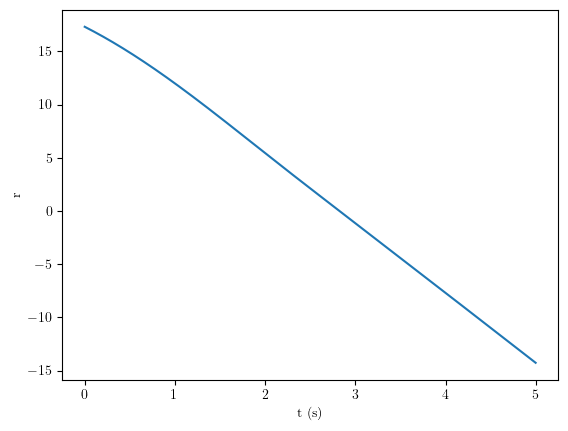

In [163]:
plt.plot(T, sol[:,0])
plt.xlabel('t (s)')
plt.ylabel('r')

In [164]:
XM = x0*np.ones_like(T) + vT[0]*T - sol[:,0]*np.sin(sol[:,1])*np.cos(sol[:,2])
YM = y0*np.ones_like(T) + vT[1]*T - sol[:,0]*np.sin(sol[:,1])*np.sin(sol[:,2])
ZM = z0*np.ones_like(T) + vT[2]*T - sol[:,0]*np.cos(sol[:,1])

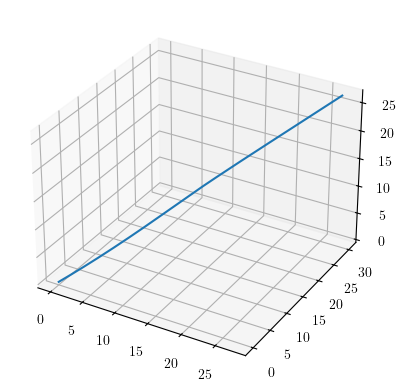

In [165]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot(XM, YM, ZM)
plt.show()

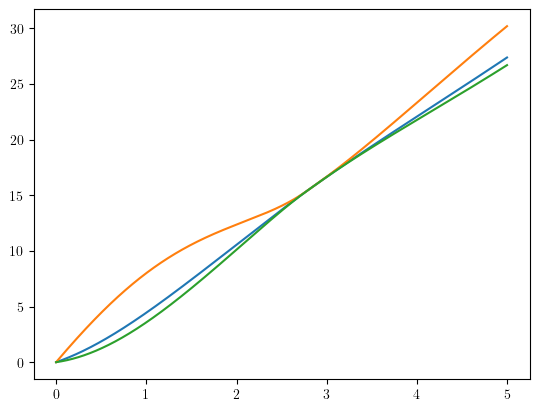

In [166]:
plt.plot(T, XM)
plt.plot(T, YM)
plt.plot(T, ZM)
plt.show()

In [167]:
def plot_trajectoriesEX7(args):
    '''
    args:
     - dt (float)
     - target_pos (tuple)
     - delta1 (float): theta0 = beta0 + delta1
     - delta2 (float): gamma0 = alpha0 + delta2
     - vm0 (float)
     - vT (tuple)
     - N (float)
    '''
    
    x0, y0, z0 = args['target_pos']
    r0 = np.sqrt(x0**2 + y0**2 + z0**2)

    beta0 = np.arccos(z0/r0)
    alpha0 = np.arccos(x0/np.sqrt(x0**2 + y0**2))
    
    theta0 = beta0 + args['delta1']
    gamma0 = alpha0 + args['delta2']
    
    T = np.arange(0., 5., args['dt'])
    
    N = args['N']
    
    vTx, vTy, vTz = args['vT']
    
    sol = odeint(ex7ODE, [r0, beta0, alpha0, theta0, gamma0],T, args=(args['vT'], vM0, N))
    near_intersection = np.intersect1d(np.nonzero(np.abs(sol[:,0])< 0.01), np.nonzero(sol[:,0]>0))
    ind = np.min(near_intersection) + 1
    
    XM = x0*np.ones_like(T[:ind]) + vTx*T[:ind] - sol[:ind,0]*np.sin(sol[:ind,1])*np.cos(sol[:ind,2])
    YM = y0*np.ones_like(T[:ind]) + vTy*T[:ind] - sol[:ind,0]*np.sin(sol[:ind,1])*np.sin(sol[:ind,2])
    ZM = z0*np.ones_like(T[:ind]) + vTz*T[:ind] - sol[:ind,0]*np.cos(sol[:ind,1])
    
    fig, ax = plt.subplots(figsize=(8,5))
    ax.plot(T[:ind], XM, label='$x_M$')
    ax.plot(T[:ind], YM, label='$y_M$')
    ax.plot(T[:ind], ZM, label='$z_M$')
    
    ax.plot(T[ind], x0+vTx*T[ind], 'ro')
    ax.annotate('$x_{T,f}$', xy=(T[ind]+0.05, x0+vTx*T[ind]+0.05))
    
    ax.plot(T[ind], y0+vTy*T[ind], 'ro')
    ax.annotate('$y_{T,f}$', xy=(T[ind]+0.05, y0+vTy*T[ind]+0.05))
    
    ax.plot(T[ind], z0+vTz*T[ind], 'ro')
    ax.annotate('$z_{T,f}$', xy=(T[ind]+0.05, z0+vTz*T[ind]+0.05))
    
    rlimit = T[ind] + 1.
    hlimit = max([x0+vTx*T[ind], y0+vTy*T[ind], z0+vTz*T[ind]]) + 1.
    ax.set_xlim(-0.1, rlimit)
    ax.set_ylim(-0.1, hlimit)
    ax.set_xlabel('t (s)')
    ax.set_ylabel('$x, y, z$ (m)')
    ax.legend()
    plt.show()
    
    fig2 = plt.figure(figsize=(8,5))
    ax2 = fig2.add_subplot(projection='3d')
    ax2.plot(XM, YM, ZM, label='$M$')
    ax2.plot(x0*np.ones_like(T) + vTx*T, y0*np.ones_like(T) + vTy*T, z0*np.ones_like(T) + vTz*T, label='$T$')
    ax2.plot(XM[-1], YM[-1], ZM[-1], 'ro')
    
    ax2.set_xlabel('$x$')
    ax2.set_ylabel('$y$')
    ax2.set_zlabel('$z$')
    ax2.set_box_aspect(None, zoom=0.85)
    ax2.legend()
    plt.show()
    
    return fig, fig2

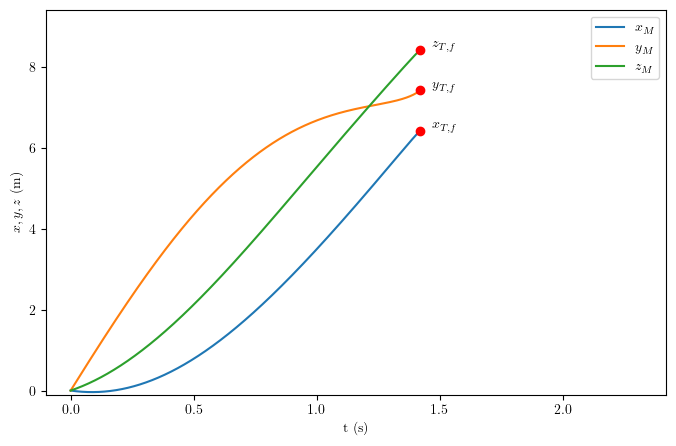

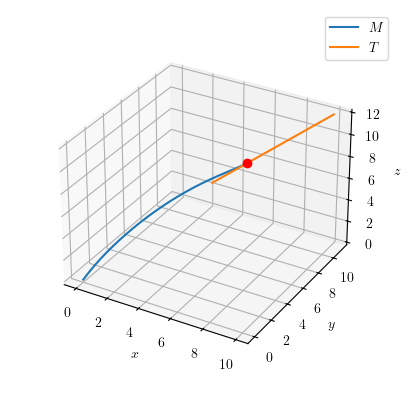

In [168]:
args = {'dt':0.001, 'target_pos':(5., 6., 7.), 'delta1':np.pi/6, 'delta2':np.pi/4, 'vm0':5., 'N':2., 'vT':(1., 1., 1.)}
component_fig, threed_fig = plot_trajectoriesEX7(args)

In [169]:
#component_fig.savefig('/Users/ashtonlowenstein/Desktop/GNC/TeX/homing_components.png', dpi=500, bbox_inches="tight")

In [170]:
#threed_fig.savefig('/Users/ashtonlowenstein/Desktop/GNC/TeX/homing_three_d.png', dpi=500, bbox_inches="tight")